<a href="https://colab.research.google.com/github/maxim920/Machine-Learning/blob/main/Kosenko_lab2_4_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'

tables = pd.read_html(url)
df = tables[2]  # Таблиця, що містить дані про ВВП

# Відображення перших рядків таблиці для перевірки
df.head()

Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022

In [6]:
df.columns

MultiIndex([( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World Bank[14]',          'Estimate'),
            (    'World Bank[14]',              'Year'),
            ('United Nations[15]',          'Estimate'),
            ('United Nations[15]',              'Year')],
           )

In [7]:
# Поточні назви стовпців
current_columns = [
    ('Country/Territory', 'Country/Territory'),
    ('IMF[1][13]', 'Forecast'),
    ('IMF[1][13]', 'Year'),
    ('World Bank[14]', 'Estimate'),
    ('World Bank[14]', 'Year'),
    ('United Nations[15]', 'Estimate'),
    ('United Nations[15]', 'Year')
]

# Зручні назви стовпців
new_columns = [
    'Country',
    'IMF_Forecast',
    'IMF_Year',
    'WorldBank_Estimate',
    'WorldBank_Year',
    'UN_Estimate',
    'UN_Year'
]

df.columns = new_columns

df.head()

,Country,IMF_Forecast,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
0,World,109529216,2024,105435540,2023,100834796,2022
1,United States,28781083,2024,27360935,2023,25744100,2022
2,China,18532633,[n 1]2024,17794782,[n 3]2023,17963170,[n 1]2022
3,Germany,4591100,2024,4456081,2023,4076923,2022
4,Japan,4110452,2024,4212945,2023,4232173,2022


In [8]:
# Виберемо необхідні стовпці та надамо їм нові назви
selected_columns = {
    'IMF_Forecast': 'MVF_2024',
    'WorldBank_Estimate': 'WorldBank_2023',
    'UN_Estimate': 'OON_2022'
}

df1 = df[['Country'] + list(selected_columns.keys())]
#df1.drop(['IMF_Year', 'WorldBank_Year', 'UN_Year'], axis=1)

# Перейменуємо стовпці
df = df1.rename(columns=selected_columns)

df.head()

,Country,MVF_2024,WorldBank_2023,OON_2022
0,World,109529216,105435540,100834796
1,United States,28781083,27360935,25744100
2,China,18532633,17794782,17963170
3,Germany,4591100,4456081,4076923
4,Japan,4110452,4212945,4232173


In [9]:
df.shape

(210, 4)

In [10]:
df.isnull().sum()

,0
Country,0
MVF_2024,0
WorldBank_2023,0
OON_2022,0


In [11]:
print("\nТипи даних кожного стовпця:\n", df.dtypes)


Типи даних кожного стовпця:
 Country           object
MVF_2024          object
WorldBank_2023    object
OON_2022          object
dtype: object


In [12]:
# Замінити всі неперетворювані значення на NaN
df.replace('-', float('nan'), inplace=True)

# Переведемо стовпці у тип float
df['MVF_2024'] = pd.to_numeric(df['MVF_2024'], errors='coerce')
df['WorldBank_2023'] = pd.to_numeric(df['WorldBank_2023'], errors='coerce')
df['OON_2022'] = pd.to_numeric(df['OON_2022'], errors='coerce')

# Виведемо типи даних після конвертації
print("\nТипи даних після конвертації: \n", df.dtypes)

# Відобразимо перші кілька рядків для перевірки
df.head(10)


Типи даних після конвертації: 
 Country            object
MVF_2024          float64
WorldBank_2023    float64
OON_2022          float64
dtype: object


,Country,MVF_2024,WorldBank_2023,OON_2022
0,World,109529216.0,105435540.0,100834796.0
1,United States,28781083.0,27360935.0,25744100.0
2,China,18532633.0,17794782.0,17963170.0
3,Germany,4591100.0,4456081.0,4076923.0
4,Japan,4110452.0,4212945.0,4232173.0
5,India,3937011.0,3549919.0,3465541.0
6,United Kingdom,3495261.0,3340032.0,3089072.0
7,France,3130014.0,3030904.0,2775316.0
8,Brazil,2331391.0,2173666.0,1920095.0
9,Italy,2328028.0,2254851.0,2046952.0


In [13]:
df.isnull().sum()

,0
Country,0
MVF_2024,15
WorldBank_2023,8
OON_2022,1


In [14]:
import numpy as np


df = df.replace({'-': np.NaN})


df = df.fillna(df.mean(numeric_only=True), axis=0)

df.head(5)

,Country,MVF_2024,WorldBank_2023,OON_2022
0,World,109529216.0,105435540.0,100834796.0
1,United States,28781083.0,27360935.0,25744100.0
2,China,18532633.0,17794782.0,17963170.0
3,Germany,4591100.0,4456081.0,4076923.0
4,Japan,4110452.0,4212945.0,4232173.0


In [15]:
df.isnull().sum()

,0
Country,0
MVF_2024,0
WorldBank_2023,0
OON_2022,0


In [16]:
df = df[df['Country'] != 'World']

# Reset the index after removing the 'World' row
df = df.reset_index(drop=True)

In [17]:
df.describe()

,MVF_2024,WorldBank_2023,OON_2022
count,2.090000e+02,2.090000e+02,2.090000e+02
mean,6.045387e+05,5.376926e+05,4.834061e+05
std,2.439594e+06,2.328003e+06,2.236990e+06
min,6.600000e+01,6.200000e+01,5.900000e+01
25%,1.446700e+04,1.043800e+04,8.772000e+03
50%,5.631000e+04,4.320500e+04,3.171700e+04
75%,4.099890e+05,3.355330e+05,2.371010e+05
max,2.878108e+07,2.736094e+07,2.574410e+07


10.Визначте відхилення (різницю) між показниками MVF_2024 та
WorldBank_2023 для кожної країни. У яких країнах ці показники
найбільше відрізняються (дати відповідт)

In [18]:
# Обчислення різниці між показниками MVF_2024 та WorldBank_2023
df['Difference_MVF_WB'] = df['MVF_2024'] - df['WorldBank_2023']

# Відсортуємо за абсолютним значенням різниці
sorted_diff = df[['Country', 'Difference_MVF_WB']].sort_values(by='Difference_MVF_WB', key=abs, ascending=False)

# Виведемо результати
print("Країни з найбільшим відхиленням між MVF_2024 та WorldBank_2023:")
print(sorted_diff.head(10))

Країни з найбільшим відхиленням між MVF_2024 та WorldBank_2023:
                      Country  Difference_MVF_WB
0               United States       1.420148e+06
195  Turks and Caicos Islands       1.121826e+06
192              Sint Maarten       1.121605e+06
177                   Curaçao       1.120154e+06
175                 Greenland       1.119992e+06
165          French Polynesia       1.117413e+06
163            Cayman Islands       1.116627e+06
159             Liechtenstein       1.115863e+06
160                   Bermuda       1.115400e+06
157                    Monaco       1.114444e+06


11.Обчисліть кореляцію між показниками MVF_2024, WorldBank_2023 та
OON_2022. Які пари змінних мають найвищу кореляцію?

In [19]:
# Обчислення кореляції між колонками
correlation = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].corr()

# Виведемо кореляційну матрицю
print("Кореляційна матриця:")
print(correlation)

# Знайдемо пари з найвищою кореляцією
print("\nПари змінних з найвищою кореляцією:")
correlation.unstack().sort_values(ascending=False).drop_duplicates().head(3)

Кореляційна матриця:
                MVF_2024  WorldBank_2023  OON_2022
MVF_2024        1.000000        0.993137  0.992032
WorldBank_2023  0.993137        1.000000  0.996336
OON_2022        0.992032        0.996336  1.000000

Пари змінних з найвищою кореляцією:


,,0
MVF_2024,MVF_2024,1.000000
WorldBank_2023,OON_2022,0.996336
MVF_2024,WorldBank_2023,0.993137


12.Обчисліть середнє значення для кожного стовпця (MVF_2024,
WorldBank_2023, OON_2022). Як це середнє значення змінюється між
роками?

In [20]:
# Обчислення середнього значення для кожного стовпця
mean_values = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].mean()

# Виведемо результати
print("Середні значення для кожного року:")
print(mean_values)

Середні значення для кожного року:
MVF_2024          604538.747884
WorldBank_2023    537692.609314
OON_2022          483406.095007
dtype: float64


13.Обчисліть стандартне відхилення показників для кожної країни. Яка
країна має найвищу варіативність у показниках між роками?

In [21]:
# Обчислимо стандартне відхилення для кожного рядка (країни)
df['StdDev'] = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].std(axis=1)

# Знайдемо країну з найвищою варіативністю
country_highest_variability = df[['Country', 'StdDev']].sort_values(by='StdDev', ascending=False).head(1)

print("Країна з найвищою варіативністю між роками:")
print(country_highest_variability)

Країна з найвищою варіативністю між роками:
         Country        StdDev
0  United States  1.519553e+06


14.Визначення країни з найвищим та найнижчим показниками: Знайдіть
країну з найвищим та найнижчим показниками у кожному з років
(MVF_2024, WorldBank_2023, OON_2022).

In [22]:
# Країни з найвищим показником у кожному з років
max_values = df[['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022']].loc[df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].idxmax()]

# Країни з найнижчим показником у кожному з років
min_values = df[['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022']].loc[df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].idxmin()]

print("Країни з найвищими показниками:")
print(max_values)

print("\nКраїни з найнижчими показниками:")
print(min_values)

Країни з найвищими показниками:
         Country    MVF_2024  WorldBank_2023    OON_2022
0  United States  28781083.0      27360935.0  25744100.0
0  United States  28781083.0      27360935.0  25744100.0
0  United States  28781083.0      27360935.0  25744100.0

Країни з найнижчими показниками:
    Country  MVF_2024  WorldBank_2023  OON_2022
208  Tuvalu      66.0            62.0      59.0
208  Tuvalu      66.0            62.0      59.0
208  Tuvalu      66.0            62.0      59.0


15.Побудуйте гістограму для розподілу показників MVF_2024 серед всіх
країн. Який вигляд має розподіл? Чи є країни, що виділяються?

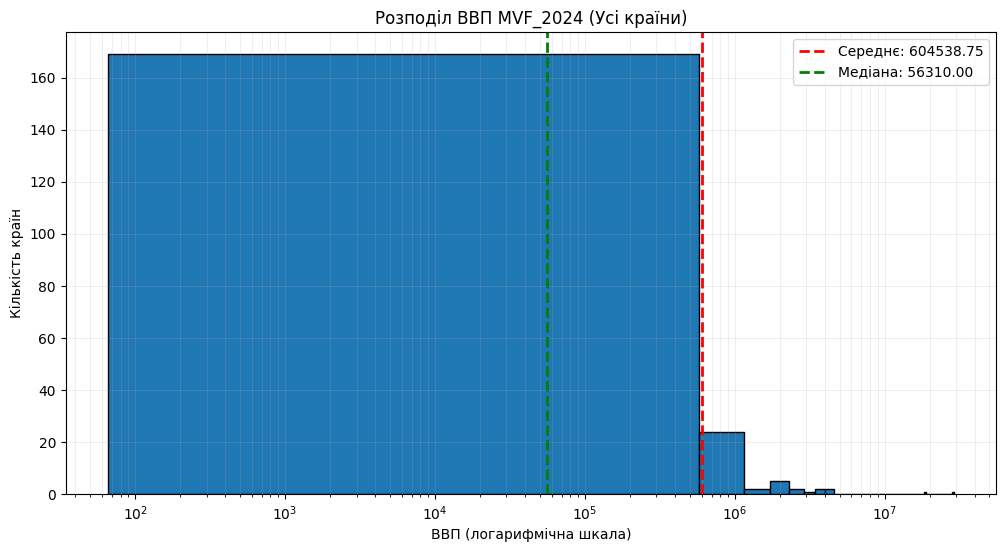


15. Аналіз розподілу ВВП:
Загальна кількість країн: 209
Кількість країн з ВВП нижче середнього: 170
Кількість країн з ВВП вище середнього: 39
Відсоток країн з ВВП нижче середнього: 81.34%
Відсоток країн з ВВП вище середнього: 18.66%

Країни з виключно високим ВВП:
         Country    MVF_2024
0  United States  28781083.0
1          China  18532633.0


In [24]:
plt.figure(figsize=(12, 6))

# Використання логарифмічної шкали для осі x через великий діапазон значень ВВП
plt.hist(df['MVF_2024'], bins=50, edgecolor='black')
plt.xscale('log')

plt.title('Розподіл ВВП MVF_2024 (Усі країни)')
plt.xlabel('ВВП (логарифмічна шкала)')
plt.ylabel('Кількість країн')

# Додавання вертикальних ліній для середнього та медіани
mean_gdp = df['MVF_2024'].mean()
median_gdp = df['MVF_2024'].median()

plt.axvline(mean_gdp, color='r', linestyle='dashed', linewidth=2, label=f'Середнє: {mean_gdp:.2f}')
plt.axvline(median_gdp, color='g', linestyle='dashed', linewidth=2, label=f'Медіана: {median_gdp:.2f}')

plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

# Обчислення та виведення деякої статистики
total_countries = len(df)
countries_below_mean = (df['MVF_2024'] < mean_gdp).sum()
countries_above_mean = (df['MVF_2024'] > mean_gdp).sum()

print(f"\n15. Аналіз розподілу ВВП:")
print(f"Загальна кількість країн: {total_countries}")
print(f"Кількість країн з ВВП нижче середнього: {countries_below_mean}")
print(f"Кількість країн з ВВП вище середнього: {countries_above_mean}")
print(f"Відсоток країн з ВВП нижче середнього: {countries_below_mean/total_countries*100:.2f}%")
print(f"Відсоток країн з ВВП вище середнього: {countries_above_mean/total_countries*100:.2f}%")

# Знаходження країн з виключно високим ВВП
high_gdp_countries = df[df['MVF_2024'] > mean_gdp + 2*df['MVF_2024'].std()]
print("\nКраїни з виключно високим ВВП:")
print(high_gdp_countries[['Country', 'MVF_2024']])



16.Розрахуйте частку кожної країни в загальному значенні для кожного
року (MVF_2024, WorldBank_2023, OON_2022). Як змінюються частки
країн з часом (дати відповідь)?

In [26]:
total_gdp = {
    'OON_2022': df['OON_2022'].sum(),
    'WorldBank_2023': df['WorldBank_2023'].sum(),
    'MVF_2024': df['MVF_2024'].sum()
}

for col in ['OON_2022', 'WorldBank_2023', 'MVF_2024']:
    df[f'{col}_Share'] = df[col] / total_gdp[col] * 100

print("\n16. Частка кожної країни у загальному ВВП за кожен рік:")
for col in ['OON_2022', 'WorldBank_2023', 'MVF_2024']:
    print(f"\nТоп-10 країн за часткою {col}:")
    print(df.nlargest(10, f'{col}_Share')[['Country', f'{col}_Share']])

# Обчислення зміни частки
df['Share_Change'] = df['MVF_2024_Share'] - df['OON_2022_Share']

print("\nТоп-5 країн з найбільшим зростанням частки ВВП з 2022 по 2024 рік:")
print(df.nlargest(5, 'Share_Change')[['Country', 'Share_Change']])

print("\nТоп-5 країн з найбільшим зменшенням частки ВВП з 2022 по 2024 рік:")
print(df.nsmallest(5, 'Share_Change')[['Country', 'Share_Change']])



16. Частка кожної країни у загальному ВВП за кожен рік:

Топ-10 країн за часткою OON_2022:
           Country  OON_2022_Share
0    United States       25.481167
1            China       17.779706
3            Japan        4.188948
2          Germany        4.035284
4            India        3.430146
5   United Kingdom        3.057522
6           France        2.746971
10          Russia        2.217540
9           Canada        2.116103
8            Italy        2.026046

Топ-10 країн за часткою WorldBank_2023:
          Country  WorldBank_2023_Share
0   United States             24.347287
1           China             15.834790
2         Germany              3.965270
3           Japan              3.748914
4           India              3.158916
5  United Kingdom              2.972147
6          France              2.697068
8           Italy              2.006492
7          Brazil              1.934249
9          Canada              1.904368

Топ-10 країн за часткою MVF_2024:
       

17.Візуалізуйте зміни в показниках для кожної країни за три роки на
графіку. Які країни показують стабільне зростання або спад (дати
відповідь)?

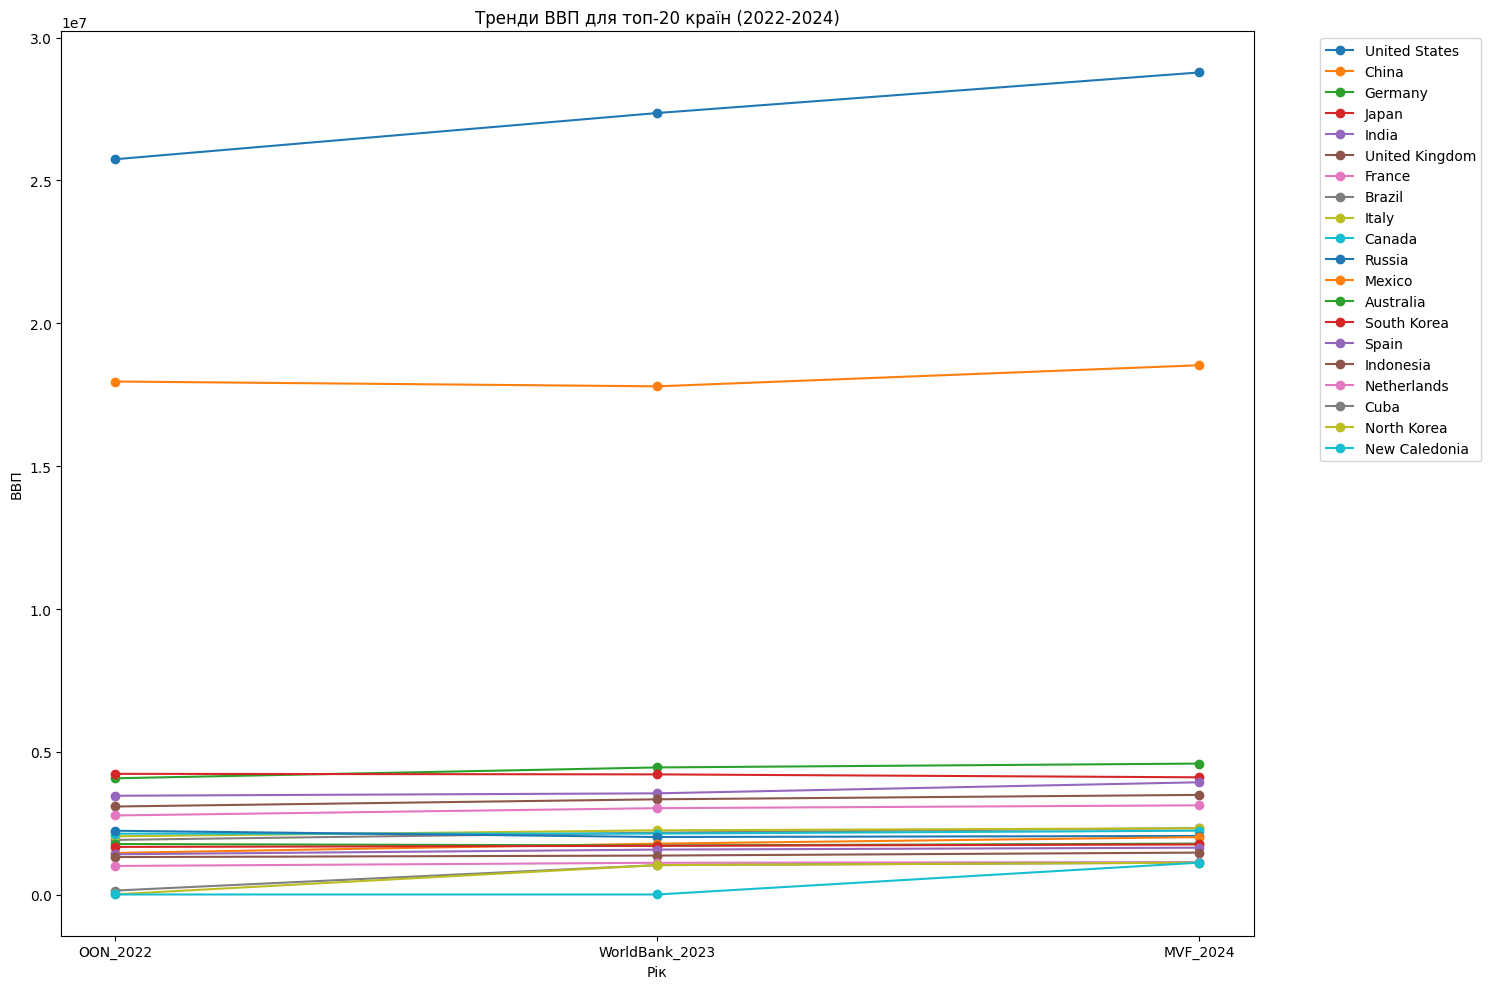


17. Країни, що демонструють стабільне зростання:
['United States', 'Germany', 'India', 'United Kingdom', 'France', 'Brazil', 'Italy', 'Canada', 'Mexico', 'South Korea', 'Spain', 'Indonesia', 'Netherlands', 'Turkey', 'Switzerland', 'Poland', 'Belgium', 'Sweden', 'Ireland', 'Thailand', 'Austria', 'Singapore', 'Philippines', 'Vietnam', 'Iran', 'Bangladesh', 'Denmark', 'Hong Kong', 'Colombia', 'Romania', 'Finland', 'Portugal', 'Kazakhstan', 'Peru', 'Algeria', 'New Zealand', 'Greece', 'Hungary', 'Ethiopia', 'Ukraine', 'Morocco', 'Cuba', 'Slovakia', 'Dominican Republic', 'Ecuador', 'Guatemala', 'Bulgaria', 'Uzbekistan', 'Costa Rica', 'Luxembourg', 'Croatia', 'Panama', 'Ivory Coast', 'Uruguay', 'Serbia', 'Lithuania', 'Tanzania', 'DR Congo', 'Slovenia', 'Uganda', 'Tunisia', 'Macau', 'Jordan', 'Cameroon', 'Bolivia', 'Paraguay', 'Latvia', 'Cambodia', 'Nepal', 'Estonia', 'Honduras', 'Senegal', 'El Salvador', 'Zimbabwe', 'Cyprus', 'Iceland', 'Georgia', 'Bosnia and Herzegovina', 'Guinea', 'Albania

In [27]:
top_20_countries = df.nlargest(20, 'MVF_2024')['Country']

plt.figure(figsize=(15, 10))
for country in top_20_countries:
    country_data = df[df['Country'] == country]
    plt.plot(['OON_2022', 'WorldBank_2023', 'MVF_2024'],
             country_data[['OON_2022', 'WorldBank_2023', 'MVF_2024']].values[0],
             marker='o', label=country)

plt.title('Тренди ВВП для топ-20 країн (2022-2024)')
plt.xlabel('Рік')
plt.ylabel('ВВП')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

def trend(row):
    if row['OON_2022'] < row['WorldBank_2023'] < row['MVF_2024']:
        return 'Стабільне зростання'
    elif row['OON_2022'] > row['WorldBank_2023'] > row['MVF_2024']:
        return 'Стабільне зниження'
    else:
        return 'Коливання'

df['Тренд'] = df.apply(trend, axis=1)

stable_growth = df[df['Тренд'] == 'Стабільне зростання']['Country'].tolist()
stable_decline = df[df['Тренд'] == 'Стабільне зниження']['Country'].tolist()

print("\n17. Країни, що демонструють стабільне зростання:")
print(stable_growth)

print("\nКраїни, що демонструють стабільне зниження:")
print(stable_decline)


Висновки:


Виявлено відмінності між прогнозами МВФ на 2024 рік та оцінками Світового банку за 2023 рік. Це підкреслює важливість використання даних з різних джерел для отримання повної картини економічного стану країн.
Встановлено високу кореляцію між показниками ВВП від різних організацій (МВФ, Світовий банк, ООН), що свідчить про узгодженість оцінок економічного стану країн різними міжнародними інституціями.
Гістограма розподілу ВВП показала значну нерівномірність між країнами. Більшість країн мають ВВП нижче середнього, тоді як невелика кількість країн має надзвичайно високі показники.
Аналіз змін частки країн у світовому ВВП виявив, що деякі країни збільшують свій економічний вплив, тоді як інші втрачають позиції. Це відображає зміни у глобальній економічній структурі.
Візуалізація змін ВВП для топ-20 країн показала різні тренди розвитку. Виявлено країни зі стабільним зростанням та країни зі стабільним зниженням показників ВВП.
Аналіз підтвердив існування значної економічної нерівності між країнами, з концентрацією більшої частини світового ВВП у невеликій кількості розвинених економік.
Дані МВФ на 2024 рік загалом показують тенденцію до зростання світової економіки, хоча і з різною динамікою для різних країн.
Різниця в оцінках між організаціями вказує на необхідність враховувати методологічні особливості кожного джерела даних при інтерпретації результатів.